In [2]:
import seaborn as sns
dataset=sns.load_dataset("mpg")
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


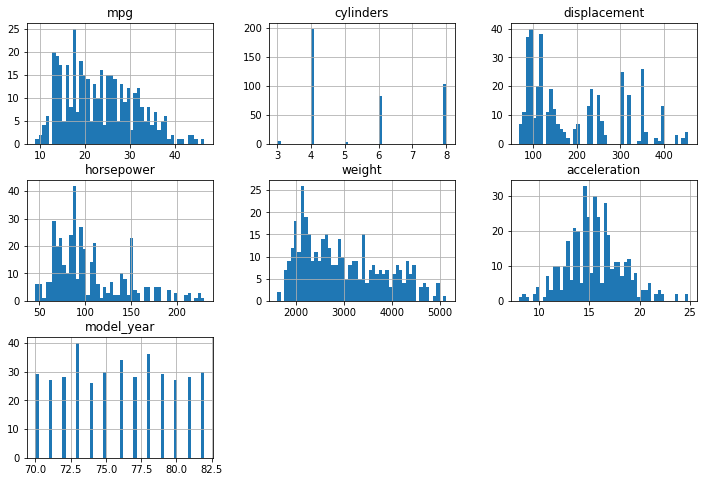

In [4]:
dataset.dropna(subset=["horsepower"], inplace=True)
dataset.drop(["origin", "name"], axis=1, inplace=True)
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(12,8))
plt.show()

In [5]:
datasetcopy=dataset.copy()
import numpy as np
from sklearn.preprocessing import FunctionTransformer
log_transformer=FunctionTransformer(np.log, inverse_func=np.exp)
datasetcopy["displacement"]=log_transformer.transform(datasetcopy[["displacement"]])
datasetcopy["horsepower"]=log_transformer.transform(datasetcopy[["horsepower"]])
datasetcopy["weight"]=log_transformer.transform(datasetcopy[["weight"]])

In [6]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder(sparse_output=False)
encoded=cat_encoder.fit_transform(datasetcopy[["cylinders"]])
encoded_df=pd.DataFrame(encoded, columns=cat_encoder.get_feature_names_out(["cylinders"]), index=datasetcopy.index)
datasetcopy=datasetcopy.drop("cylinders", axis=1)
datasetcopy=pd.concat([datasetcopy,encoded_df], axis=1)

In [7]:
X=datasetcopy.drop("mpg", axis=1)
y=datasetcopy["mpg"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
pipeline=Pipeline([
    ("standardize", StandardScaler()),
    ("model", LinearRegression())
])

In [9]:
pipeline.fit(X_train, y_train)
final_predictions=pipeline.predict(X_test)

In [10]:
from sklearn.metrics import r2_score, mean_absolute_error
final_r2=r2_score(y_test, final_predictions)
final_mae=mean_absolute_error(y_test, final_predictions)
print(final_r2)
print(final_mae)

0.8386948219175645
2.249294505541541


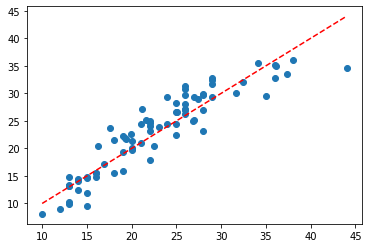

In [11]:
plt.scatter(y_test, final_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [12]:
from sklearn.model_selection import cross_val_score
crossr2=cross_val_score(pipeline, X_train, y_train, scoring='r2', cv=10)
pd.Series(crossr2).describe()

count    10.000000
mean      0.846758
std       0.043642
min       0.767530
25%       0.811209
50%       0.868662
75%       0.877101
max       0.894333
dtype: float64

In [13]:
crossmae=-cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
pd.Series(crossmae).describe()

count    10.000000
mean      2.242051
std       0.418883
min       1.716906
25%       1.980940
50%       2.187892
75%       2.338885
max       3.185899
dtype: float64